<a href="https://colab.research.google.com/github/joezerr/Project/blob/main/No_4_Harris_corner_algorithm_%7C_UTS_Computer_Vision_%7C_2440057672.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES**

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow #used to show image since cv2.imshow isnt applicable in google colab

In [ ]:
source = '/content/louvre.jpg' #ill be using louvre image. The next step is to make it grayscale
image=cv2.imread(source)

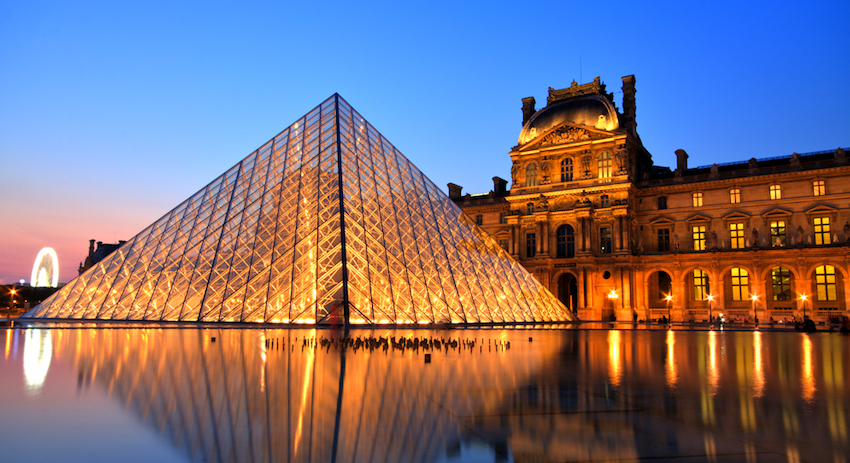

In [ ]:
cv2_imshow(image)

In [ ]:
#make it grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

window_size=5
k=0.04
threshold=0.30

#apply gaussian filter with 3x3 kernel size
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

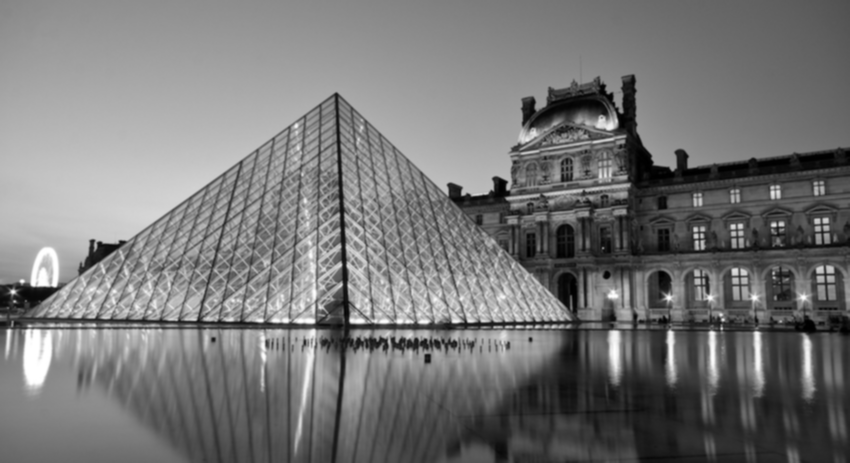

In [ ]:
cv2_imshow(img_gaussian)

In [ ]:
height = image.shape[0]   #shape[0] represents the image height
width = image.shape[1]    #shape[1] represents the image height 
matrix_R = np.zeros((height,width))

## 1a.  Compute Gaussian derivatives at each pixel

In [ ]:
#calculate the first image derivatives using sobel
dx = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=3)

## 1b.  Compute second moment matrix M in a Gaussian window around each pixel

In [ ]:
#calculate the previous values to get the second derivatives and multipy them
dx2=np.square(dx)
dy2=np.square(dy)
dxy=dx*dy

offset = int( window_size / 2 )

## 1c. Compute corner response function R


In [ ]:
#calculate sum of  the second derivatives for each pixel, make a 1 pixel sift in the images
for y in range(offset, height-offset):
     for x in range(offset, width-offset):
        Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
        Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])

        #define the matrix
        H = np.array([[Sx2,Sxy],[Sxy,Sy2]])

        #calculate response function
        det=np.linalg.det(H)
        tr=np.matrix.trace(H)
        R=det-k*(tr**2)
        matrix_R[y-offset, x-offset]=R

## 1d & 1e. Threshold R + Find local maxima of response function

In [ ]:
#threshold applied
cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            value=matrix_R[y, x]
            if value>threshold:
                #append the corner
                cv2.circle(image,(x,y),3,(0,255,0))

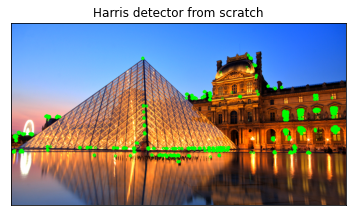

In [ ]:
#plot
plt.figure("Harris detector from scratch")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Harris detector from scratch")
plt.xticks([]), plt.yticks([])
plt.show()

*our model has succefully detected the edges*